<a href="https://colab.research.google.com/github/reitezuz/18NES1-2025-/blob/main/week7/images_simple_mlp_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MLP Autoencoder for Color Transformation of Images

- This notebook trains a simple MLP model to learn an identity mapping over RGB pixels from a training image, optionally extended with custom color vectors.
- The trained model is then applied to a set of testing images, and the results are visualized and saved.  
- It demonstrates how a neural network can slightly adjust image appearance based on the learned pixel distribution.

It includes:
- Learning from one photo or simple synthetic image and applying the trained model to other images to see generalization.
- Augmenting the training set with custom color samples to strengthen specific color tendencies (e.g., emphasizing red or purple).
- Visualizing effects of underfitting by using small networks that lack capacity to reconstruct input faithfully.


In [8]:
# Helper functions:

import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers


# --- Helper function to load and normalize image ---
def load_image(path):
    img = Image.open(path).convert('RGB')
    img_array = np.asarray(img).astype('float32') / 256.0  # scale to [0,1)
    shape = img_array.shape
    flat = img_array.reshape(-1, 3)
    return flat, shape, img

# --- Function to apply model to image and visualize ---
def transform_and_visualize(path_in, title):
    x_in, shape, img_orig = load_image(path_in)
    y_out = model.predict(x_in, batch_size=512)
    img_out = (np.clip(y_out, 0, 1) * 256).astype('uint8').reshape(shape)

    # Define output path automatically
    basename = os.path.splitext(os.path.basename(path_in))[0]
    path_out = os.path.join("images_out", f"output_{basename}.png")
    os.makedirs(os.path.dirname(path_out), exist_ok=True)
    Image.fromarray(img_out).save(path_out)

    # Plot original and transformed images
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f"Original: {title}")
    plt.imshow(img_orig)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Transformed: {title}")
    plt.imshow(img_out)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [9]:
# --- Download and extract images from GitHub if not already present ---
import requests, zipfile, io
image_folder = "images"
if not os.path.exists(image_folder):
    zip_url = "https://github.com/reitezuz/18NES1-2025-/raw/main/week7/images.zip"
    response = requests.get(zip_url)
    z = zipfile.ZipFile(io.BytesIO(response.content))
    z.extractall(image_folder)

s = t = 240


## 1. Learn the identity on a photograph
- experiment with the number of neurons and compare the results
- change the training image to 'im6.png' (synthetic data) and observe the differences
- you can experiment with your own photographs or synthetic images

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 5)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38 (152.00 B)

 Trainable params: 38 (152.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0834
Epoch 2/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0072
Epoch 3/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022
Epoch 4/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 5/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8070e-04
Epoch 6/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5254e-04
Epoch 7/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2017e-04
Epoch 8/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4429e-04
Epoch 9/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0555e-04
Epoch 10/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8058e-04
Epoch 11/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6273e-04
Epoch 12/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.4937e-04
Epoch 13/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3825e-04
Epoch 14/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2656e-04
Epoch 15/20
326/3

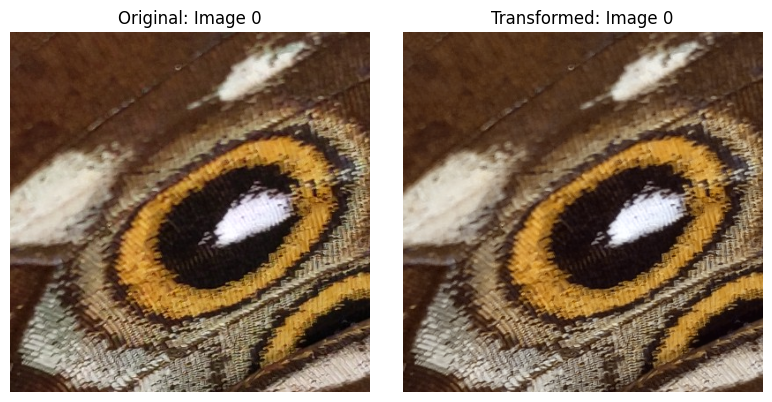

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


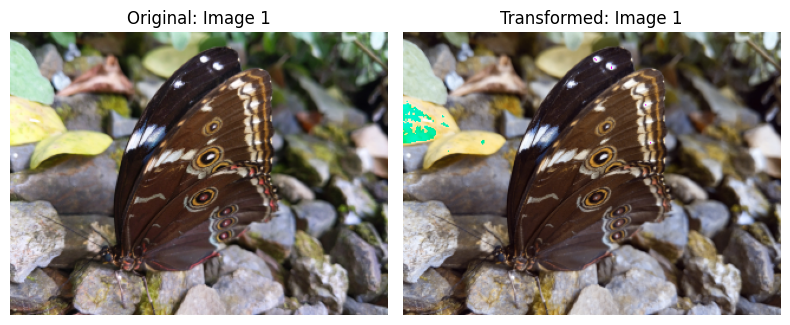

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


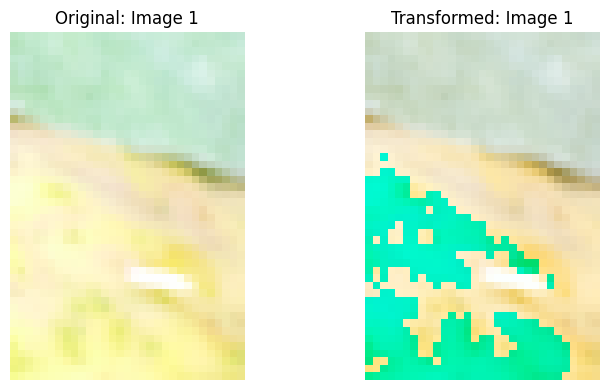

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


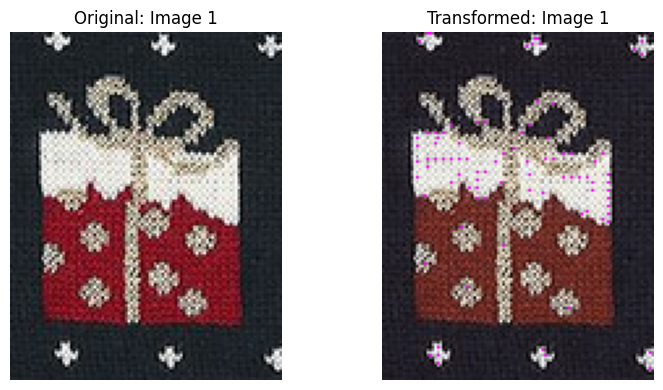

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


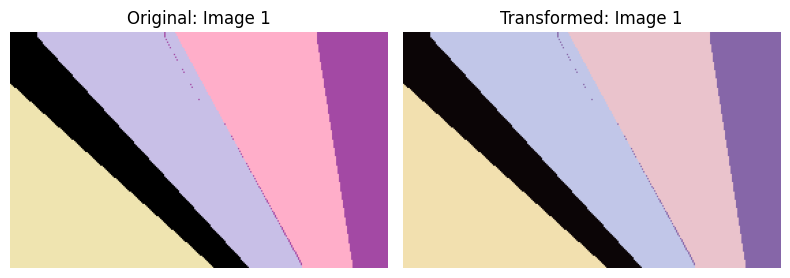

267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


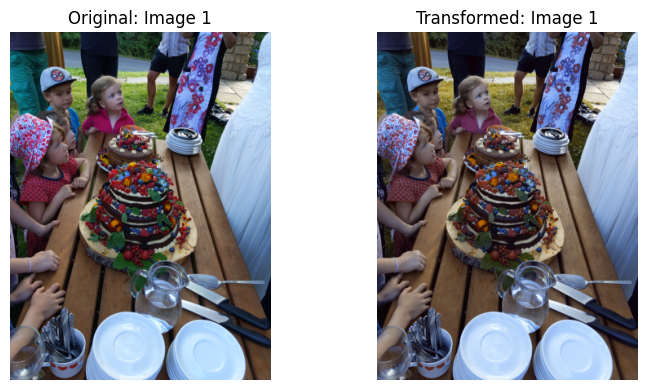

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


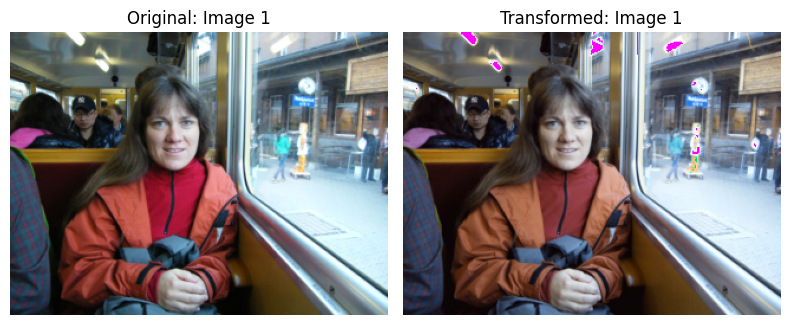

In [10]:
training_image_name = 'im3.bmp'
testing_image_names = ['im2.bmp', 'im4.bmp', 'im5.bmp', 'im6.png', 'im1.bmp', 'im0.bmp']

number_hidden = 5
do_extend = False
epochs = 20

# extended data:
ext = np.vstack([
    np.tile([1, 0, 0], (s * t, 1)) # red
    #np.tile([1, 1, 0], (s * t, 1)), # yellow
    #np.tile([1, 0, 1], (s * t, 1))  # violet
])

##########################################################################
# Add full paths after defining folder
path = os.path.join(image_folder, training_image_name)
paths = [os.path.join(image_folder, name) for name in testing_image_names]

# --- Load and preprocess the training data (image) ---
x, shape, img_original = load_image(path)
s, t, u = shape

# Create extended training data
if do_extend:  # use the extended data
  X = np.vstack([x, ext])
  T = np.vstack([x, ext])
else:
  X = x.copy()  # use only original image
  T = x.copy()

##########################################################################
# --- Define and train the MLP model ---
model = keras.Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(number_hidden, activation='relu'),
    layers.Dense(3, activation='linear')
])

model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X, T, epochs=epochs, batch_size=512, verbose=1)

###########################################################################
# --- Apply model to original image and testing images ---
transform_and_visualize(path, "Image 0")
for path1 in paths:
    transform_and_visualize(path1, "Image 1")


## 2. Learn a color stylization effect
- Extend the training data with more red or purple colors (or modify the training image itself)
- Observe how the network tends to shift the output colors on other images
- Try different amounts of color augmentation and compare the effect

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 5)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38 (152.00 B)

 Trainable params: 38 (152.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0470
Epoch 2/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.6324e-04
Epoch 3/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7379e-04
Epoch 4/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2017e-04
Epoch 5/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.1857e-05
Epoch 6/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.3364e-06
Epoch 7/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7380e-06
Epoch 8/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6508e-07
Epoch 9/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3416e-07
Epoch 10/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2904e-08
Epoch 11/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3396e-08
Epoch 12/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3225e-08
Epoch 13/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.5941e-09
Epoch 14/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.8066e-09
Epoch

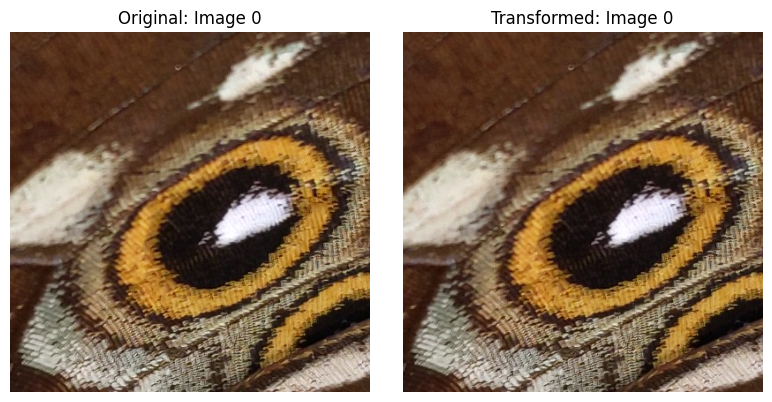

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


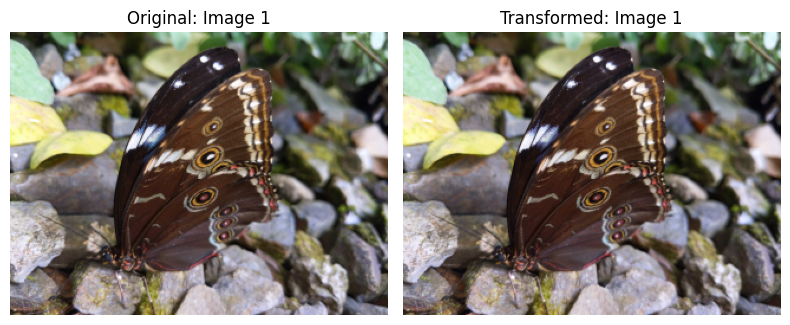

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


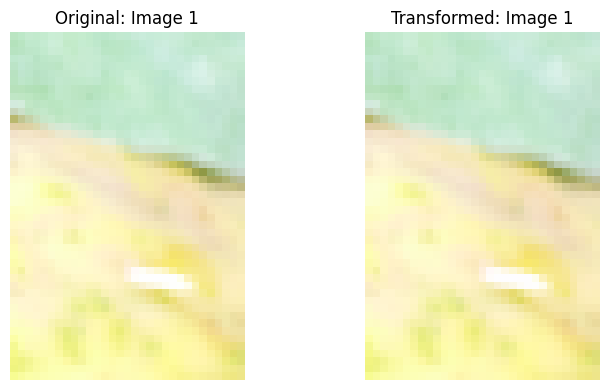

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


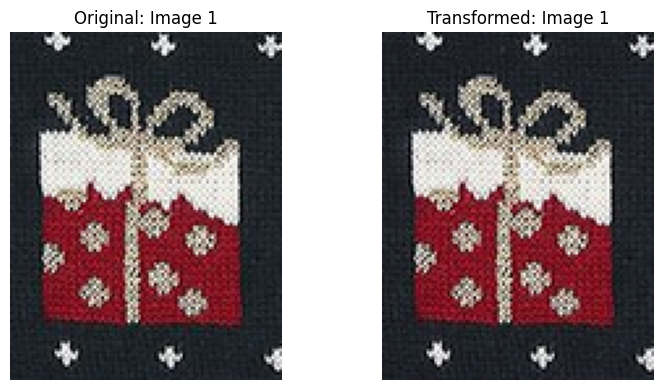

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


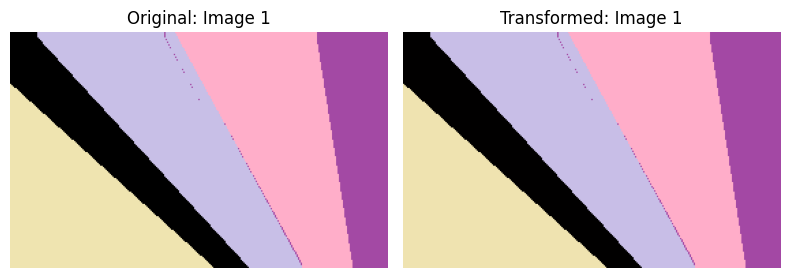

267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


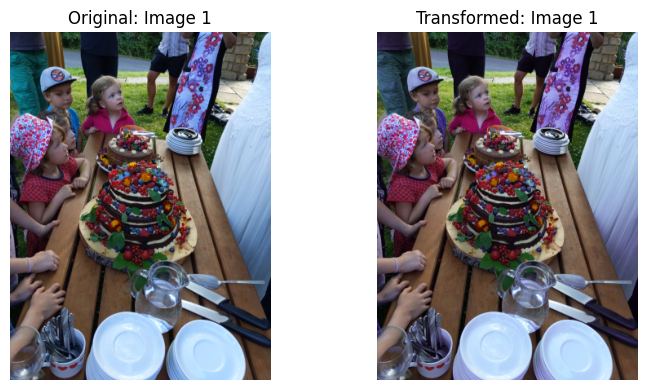

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


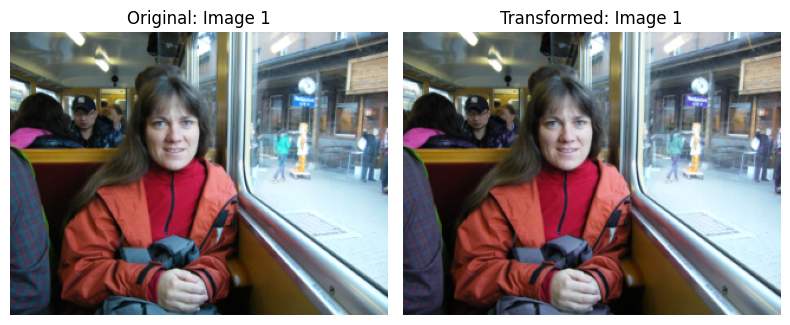

In [11]:
training_image_name = 'im3.bmp'
testing_image_names = ['im2.bmp', 'im4.bmp', 'im5.bmp', 'im6.png', 'im1.bmp', 'im0.bmp']

number_hidden = 5
do_extend = True
epochs = 20

# extended data:
ext = np.vstack([
    np.tile([1, 0, 0], (s * t, 1)) # red
    #np.tile([1, 1, 0], (s * t, 1)), # yellow
    #np.tile([1, 0, 1], (s * t, 1))  # violet
])

##########################################################################
# Add full paths after defining folder
path = os.path.join(image_folder, training_image_name)
paths = [os.path.join(image_folder, name) for name in testing_image_names]

# --- Load and preprocess the training data (image) ---
x, shape, img_original = load_image(path)
s, t, u = shape

# Create extended training data
if do_extend:  # use the extended data
  X = np.vstack([x, ext])
  T = np.vstack([x, ext])
else:
  X = x.copy()  # use only original image
  T = x.copy()

##########################################################################
# --- Define and train the MLP model ---
model = keras.Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(number_hidden, activation='relu'),
    layers.Dense(3, activation='linear')
])

model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X, T, epochs=epochs, batch_size=512, verbose=1)

###########################################################################
# --- Apply model to original image and testing images ---
transform_and_visualize(path, "Image 0")
for path1 in paths:
    transform_and_visualize(path1, "Image 1")

## The experiment with synthetic data

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 5)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38 (152.00 B)

 Trainable params: 38 (152.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.0153
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2358
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0440
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0187
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0166
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0157
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100
Epoch 14/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094
Epoch 15/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088
Epoch 16/20
94/94 ━

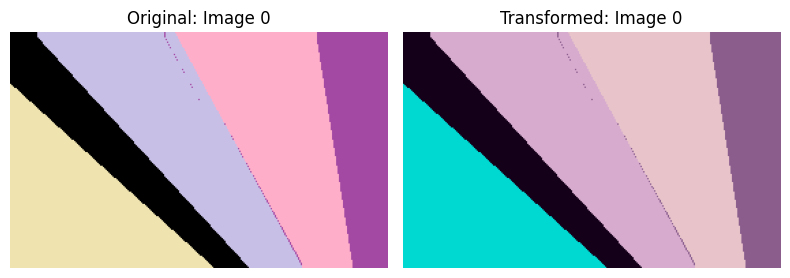

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


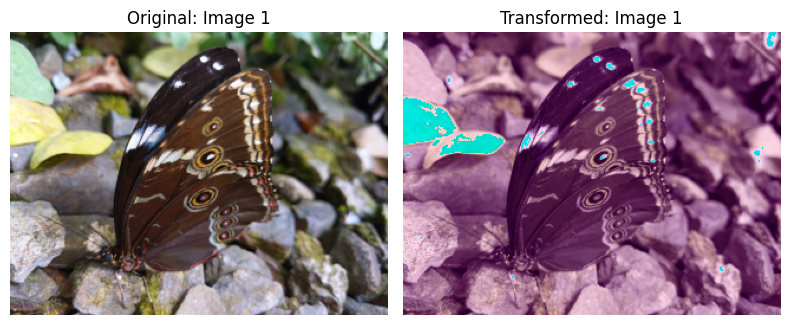

326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


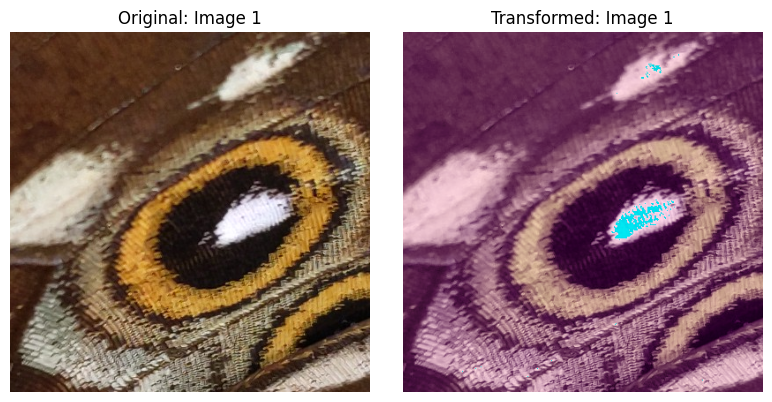

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


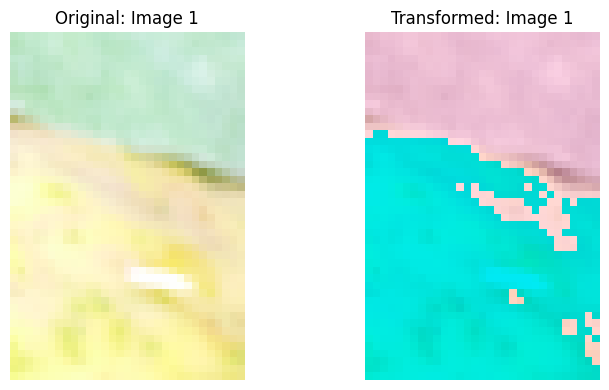

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


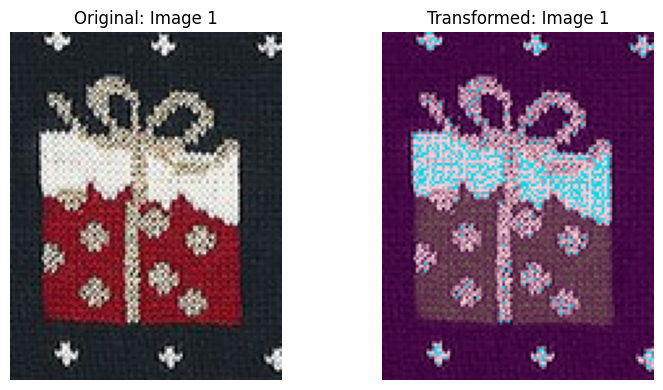

267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


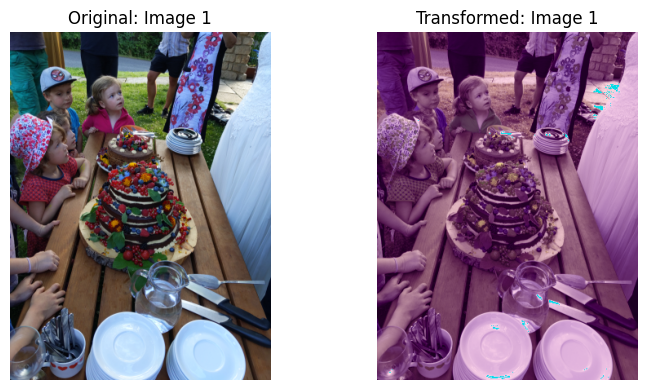

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


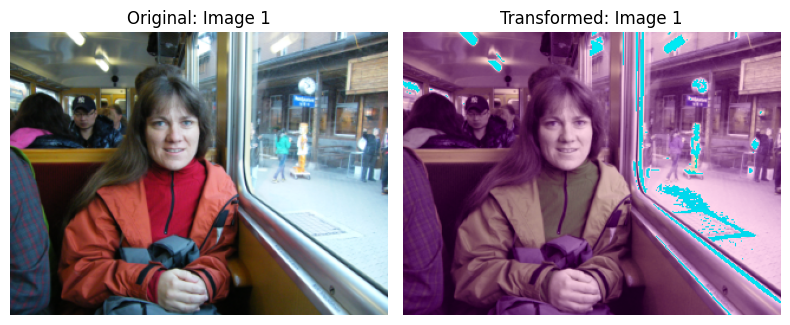

In [13]:
training_image_name = 'im6.png'
testing_image_names = ['im2.bmp', 'im3.bmp', 'im4.bmp', 'im5.bmp', 'im1.bmp', 'im0.bmp']

number_hidden = 5
do_extend = False
epochs = 20

# extended data:
ext = np.vstack([
    np.tile([1, 0, 0], (s * t, 1)) # red
    #np.tile([1, 1, 0], (s * t, 1)), # yellow
    #np.tile([1, 0, 1], (s * t, 1))  # violet
])

##########################################################################
# Add full paths after defining folder
path = os.path.join(image_folder, training_image_name)
paths = [os.path.join(image_folder, name) for name in testing_image_names]

# --- Load and preprocess the training data (image) ---
x, shape, img_original = load_image(path)
s, t, u = shape

# Create extended training data
if do_extend:  # use the extended data
  X = np.vstack([x, ext])
  T = np.vstack([x, ext])
else:
  X = x.copy()  # use only original image
  T = x.copy()

##########################################################################
# --- Define and train the MLP model ---
model = keras.Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(number_hidden, activation='relu'),
    layers.Dense(3, activation='linear')
])

model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X, T, epochs=epochs, batch_size=512, verbose=1)

###########################################################################
# --- Apply model to original image and testing images ---
transform_and_visualize(path, "Image 0")
for path1 in paths:
    transform_and_visualize(path1, "Image 1")